<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6

## Conceptual

### Question 1

We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain $p + 1$ models, containing $0, 1, 2,...,p$ predictors. Explain your answers:

> (a) Which of the three models with $k$ predictors has the smallest *training* RSS?

> (b) Which of the three models with $k$ predictors has the smallest *test* RSS?

> (c) True or False:

> > i. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the ($k+1$)-variable model identified by forward stepwise selection.

> > ii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the ($k + 1$)-variable model identified by backward stepwise selection.

> > iii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the ($k + 1$)-variable model identified by forward stepwise selection.

> > iv. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the ($k+1$)-variable model identified by backward stepwise selection.

> > v. The predictors in the $k$-variable model identified by best subset are a subset of the predictors in the ($k + 1$)-variable model identified by best subset selection.

#### Answers to a

***Which of the three models with $k$ predictors has the smallest <u>training</u> RSS?***

Each of the three methods progress, NOT by comparing RSS among models, but rather by comparing an estimate of fit to test data (e.g., AIC, BIC, $R_{adj}^2$).

I think this means that any of the three methods may produce the lowest *training* RSS; this would be somewhat incidental since they are not trying to optimize for this.

#### Answer to b

***Which of the three models with $k$ predictors has the smallest <u>test</u> RSS?***

Since only the *best-subset* method will examine all $k$-predictor models, it will discover the best-fit model.  Either stepwise method may also find the same model, but this is not guarenteed.

#### Answer to c

***True or False:***

> ***i. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the ($k+1$)-variable model identified by forward stepwise selection.***

> > TRUE.  Since the $k+1$-variable model is defined as the $k$-variable model plus the next most appropriate ($k+1^{th}$) variable.

> >

> ***ii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the ($k + 1$)-variable model identified by backward stepwise selection.***

> > TRUE.  For the analagous reason given in (i).

> >

> ***iii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the ($k + 1$)-variable model identified by forward stepwise selection.***

> > FALSE.  These are both "greedy" algorithms such that their path though variable-selection space are not necessarily related.

> >

> ***iv. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the ($k+1$)-variable model identified by backward stepwise selection.***

> > FALSE.  For the analagous reason given in (iii).

> >

> ***v. The predictors in the $k$-variable model identified by best subset are a subset of the predictors in the ($k + 1$)-variable model identified by best subset selection.***

> > FALSE.  Best-subset selection is not a greedy algorithm; all possible models are examined.

### Question 2

For parts (a) through (c), indicate which of i. through iv. is correct. Justify your answer.

> (a) The lasso, relative to least squares, is:

> > i. More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

> > ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

> > iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

> > iv. Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

> (b) Repeat (a) for ridge regression relative to least squares.

> (c) Repeat (a) for non-linear methods relative to least squares.

#### Answers

The correct answer for both **(a)** and **(b)** is

> ***iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance***.  

This can be seen by realizing that both lasso and ridge regression can be thought of as *least squares <u>plus penalty</u>*,

$$\text{RSS} + \lambda \left(\sum_{j=1}^p |\beta|^q\right)^{1/q}$$

which acts as an additional constrant on the solution space.  This is the same as imposing bias; variance is obversely reduced since the solution space is smaller.  

For **(c)**, the correct answer is

> ***ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias***.  

Nonlinear models are inherently more flexible than linear models.  The expands the solution space, but at the risk of admitting too much variance.

### Question 3

Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$\sum_{i=1}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 \text{subject to } \sum_{j=1}^{p} |\beta_j| \le s$$

for a particular value of $s$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

> (a) As we increase $s$ from 0, the training RSS will:

> > i. Increase initially, and then eventually start decreasing in an inverted U shape.

> > ii. Decrease initially, and then eventually start increasing in a U shape.

> > iii. Steadily increase.

> > iv. Steadily decrease.

> > v. Remain constant.

> (b) Repeat (a) for test RSS.

> (c) Repeat (a) for variance.

> (d) Repeat (a) for (squared) bias.

> (e) Repeat (a) for the irreducible error.

#### Answers

I want to think about this in terms of a different formulation of the lasso:

$$\sum_{i=1}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^p |\beta_j| \approx RSS_{LS} + \frac{1}{s} \sum_{j=1}^p |\beta_j|$$

***Training RSS***

To start, I want to get a sense of what's happening as we increase $s$ from 0.  The question is detailing the lasso wherein an additional penality is incurred as a function of $s$; the larger $s$, the smaller this additional penalty.  Hence, the correct answr is **iv. Steadily decrease.**

\

***Test RSS***

Another way we can characterize the additional penalty is to say that smaller values of $s$ imply a more restricted model while larger values of $s$ imply more flexible models.  On test data, increased flexibility may initially decrease total error but will eventually yield increasing error.  So the most appropriate answer is **ii. Decrease initially, and then eventually start increasing in a U shape.**

\

***Variance***

Piggybacking off of the previous answer, larger values of $s$ imply greater flexibility, and thus a larger solution space in which to vary.  Thus, the correct answer is **iii. Steadily increase.**

\

***Bias***

If increasing $s$ increases variance, then it also decreases bias.  So the correct answr is **iv. Steadily decrease.**

\

***Irreducible Error***

Irreducible error is, well, irreducible.  So the correct answer is **v. remain constant**.

\

Except for training RSS, we can see these tendencies in the doctored image below.



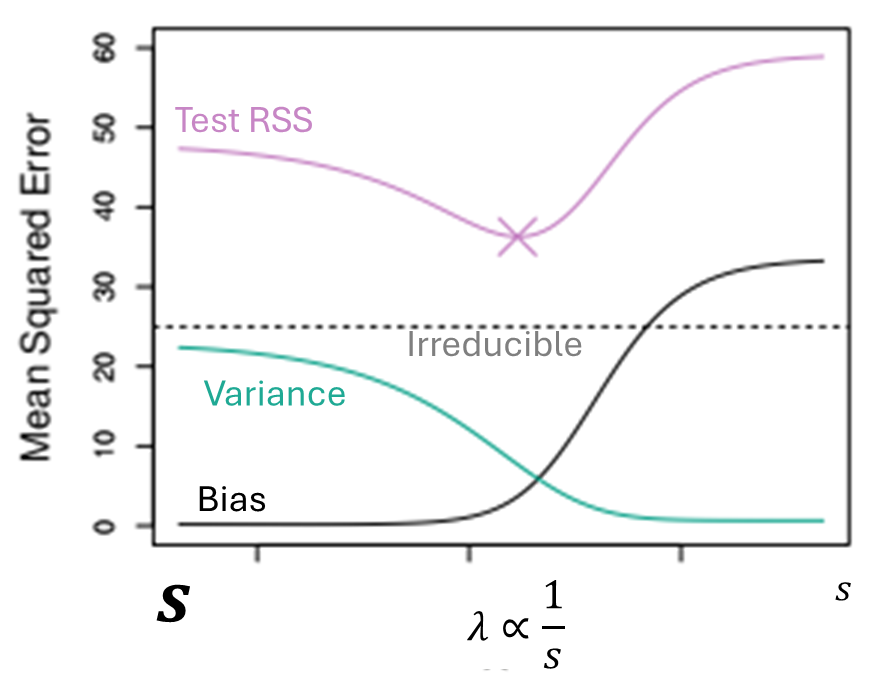